# Covid19 Convolutional Neural Network Analysis
Traditional prediction models can only give us a probable forecast, Using image recognition will generate better predictions. By using a small section in the picture instead of a few pixels, convolution makes deep neural network better focus on features. Thus, we could have better estimates in differentiating healthy chest Xray from pneumonia’s chest Xray.  
-- Created by Zhengkun Xu

In [0]:
# import necessary libraries
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
# # Upload Data Collected From CDC.
uploaded=files.upload()

Saving chest_xray.zip to chest_xray.zip
Saving Covid19.zip to Covid19.zip


In [0]:
# Unzip chest_xray file
zip_ref = zipfile.ZipFile('chest_xray.zip', 'r')
zip_ref.extractall()

In [0]:
# Setting directory for train and test data
train_dir = os.path.join('/content/train')
test_dir = os.path.join('/content/test')

# Directory with our training normal xray
train_nor_dir = os.path.join(train_dir, 'NORMAL')

# Directory with our training penumonia xray
train_penu_dir = os.path.join(train_dir, 'PENUMONIA')

# Directory with our testing normal xray
test_nor_dir = os.path.join(test_dir, 'NORMAL')

# Directory with our testing penumonia xray
train_penu_dir = os.path.join(test_dir, 'PENUMONIA')

In [0]:
# Build convolution net work
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Augmentation for training images
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.25,
      vertical_flip=True,
      horizontal_flip=True,      
      fill_mode='nearest')

# No need to augment for Test Images
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Model Training
train_generator = train_datagen.flow_from_directory(
        train_dir,  # training images source directory 
        target_size=(150, 150),  # standardize the target to be 150x150
        batch_size=20,           # feed in 20 images per round        
        class_mode='binary')     #Normal and penumonia only 2 classes, so use Binary
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 1200 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [9]:
model.summary()
history = model.fit(
      train_generator,
      steps_per_epoch= 60,  # 1200 images / 20 = 60
      epochs=50,
      validation_data=test_generator,
      validation_steps=30,  # 600 images / 20 = 30
      verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

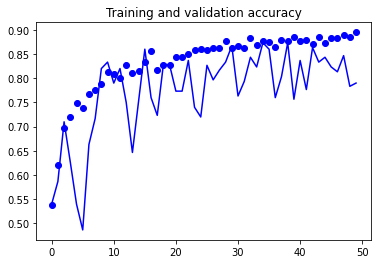

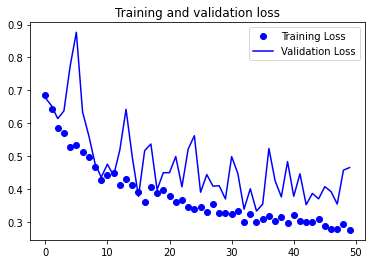

In [10]:
# Plotting and Visualiation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-05-02 04:11:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   131MB/s    in 0.6s    

2020-05-02 04:11:24 (131 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [14]:
history = model.fit(
            train_generator,
            validation_data = test_generator,
            steps_per_epoch = 60,
            epochs = 20,
            validation_steps = 30,
            verbose = 1)

Epoch 1/20
60/60 [==============================] - 100s 2s/step - loss: 0.4505 - acc: 0.8300 - val_loss: 0.3082 - val_acc: 0.8767
Epoch 2/20
60/60 [==============================] - 97s 2s/step - loss: 0.2917 - acc: 0.8850 - val_loss: 0.3116 - val_acc: 0.8867
Epoch 3/20
60/60 [==============================] - 97s 2s/step - loss: 0.2598 - acc: 0.9025 - val_loss: 0.4057 - val_acc: 0.8333
Epoch 4/20
60/60 [==============================] - 98s 2s/step - loss: 0.2457 - acc: 0.9050 - val_loss: 0.5899 - val_acc: 0.7933
Epoch 5/20
60/60 [==============================] - 97s 2s/step - loss: 0.2696 - acc: 0.9092 - val_loss: 0.3545 - val_acc: 0.8533
Epoch 6/20
60/60 [==============================] - 98s 2s/step - loss: 0.2020 - acc: 0.9208 - val_loss: 0.3502 - val_acc: 0.8667
Epoch 7/20
60/60 [==============================] - 97s 2s/step - loss: 0.2315 - acc: 0.9142 - val_loss: 0.3105 - val_acc: 0.8900
Epoch 8/20
60/60 [==============================] - 97s 2s/step - loss: 0.2216 - acc: 0.9

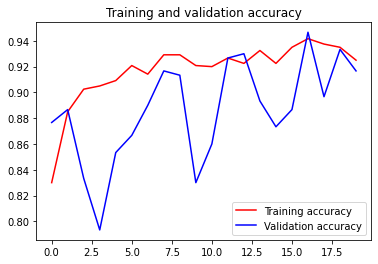

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Using TensorFlow backend.


Saving person26_bacteria_126.jpeg to person26_bacteria_126.jpeg
[1.]
person26_bacteria_126.jpeg The patient has sign of penumonia


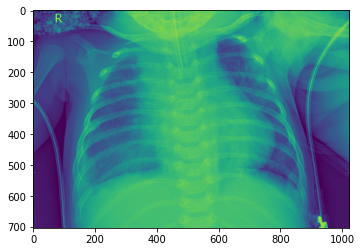

In [16]:
# Testing with real penumonia X-ray pictures.

import numpy as np

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  plt.imshow(mpimg.imread(path))

  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.95:
    print(fn + " The patient has sign of penumonia")
    
  else:
    print(fn + " The patient has no sign of regular penumonia")

In [0]:
zip_ref = zipfile.ZipFile('Covid19.zip', 'r')
zip_ref.extractall()

In [0]:
train_dir = os.path.join('/content/Train')
test_dir = os.path.join('/content/Test')

# Directory with our training penumonia xray
train_pen_dir = os.path.join(train_dir, 'penumonia')

# Directory with our training covid19 xray
train_cov_dir = os.path.join(train_dir, 'Covid19')

# Directory with our testing penumonia xray
test_pen_dir = os.path.join(test_dir, 'penumonia')

# Directory with our testing covid19 xray
train_cov_dir = os.path.join(test_dir, 'Covid19')

In [0]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Augmentation for training images
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.25,
      vertical_flip=True,
      horizontal_flip=True,      
      fill_mode='nearest')

# No need to augment for Test Images
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # training images source directory 
        target_size=(150, 150),  # standardize the target to be 150x150
        batch_size=20, # feed in 20 images per round        
        class_mode='binary') # only 2 classes, so use Binary
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [22]:
model.summary()
history = model.fit(
      train_generator,
      steps_per_epoch= 20,  # 400 images
      epochs=50,
      validation_data=test_generator,
      validation_steps=10,  # 200 images 
      verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 15, 15, 128)      

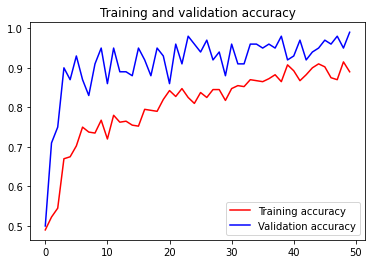

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving Covid19_Chest_Xray.jpg to Covid19_Chest_Xray (1).jpg
[0.]
Covid19_Chest_Xray.jpg The patient has Covid19


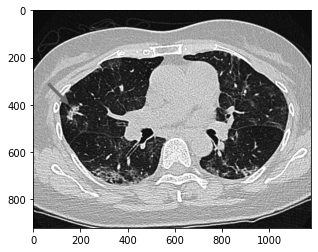

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  plt.imshow(mpimg.imread(path))

  classes = model.predict(images, batch_size=5)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " The patient has regular penumonia")
    
  else:
    print(fn + " The patient has Covid19")